## Question 1: Data Preperation and Overview

### 1) Load the overall graph and individual book graphs

In [256]:
import numpy as np
import pandas as pd
import seaborn as sns
import networkx as nx
from networkx.algorithms.community import girvan_newman
from networkx.drawing.nx_agraph import graphviz_layout
from sklearn.cluster import SpectralClustering
import community
import matplotlib.pyplot as plt
from matplotlib import figure, text
%matplotlib inline

In [59]:
def load_graphs(csv):

    df = pd.read_csv(csv)

    G = nx.Graph()

    for _, row in df.iterrows():
        source = row['source']
        target = row['target']
        weight = row['weight']
        G.add_edge(source, target, weight=weight)
    
    return G

In [324]:
def plot_graph(G, book):
    
    # Draw the graph with nodes colored by community and scaled node/label sizes
    plt.figure(figsize=(12, 12))
    
    pos = nx.random_layout(G, seed = 42)  # You can use a different layout algorithm if needed
    
    nx.draw_networkx_nodes(G, pos, node_size=20, node_color ='mediumpurple')
    
    # Normalize edge weights for visualization
    max_weight = max(edge_weights)
    normalized_weights = [w / max_weight for w in edge_weights]
    
    # Draw edges with thickness based on edge weights
    nx.draw_networkx_edges(G, pos, width=normalized_weights, alpha=0.5)

    # Draw labels with sizes based on Betweenness Centrality
    nx.draw_networkx_labels(G, pos, font_size = 8,labels = {node: node for node in G.nodes()}, verticalalignment='bottom')

    # Show plot for the current book
    plt.title(f'{book}')
    plt.show()
    

In [60]:
allbooks = load_graphs('/Users/priyanaaragula/CornellTech/GraphBasedDS/Homework_4/harry-potter-interactions/data/hp_all_edges.csv')
book1 = load_graphs('/Users/priyanaaragula/CornellTech/GraphBasedDS/Homework_4/harry-potter-interactions/data/hp_book1_edges.csv')
book2 = load_graphs('/Users/priyanaaragula/CornellTech/GraphBasedDS/Homework_4/harry-potter-interactions/data/hp_book2_edges.csv')
book3 = load_graphs('/Users/priyanaaragula/CornellTech/GraphBasedDS/Homework_4/harry-potter-interactions/data/hp_book3_edges.csv')
book4 = load_graphs('/Users/priyanaaragula/CornellTech/GraphBasedDS/Homework_4/harry-potter-interactions/data/hp_book4_edges.csv')
book5 = load_graphs('/Users/priyanaaragula/CornellTech/GraphBasedDS/Homework_4/harry-potter-interactions/data/hp_book5_edges.csv')
book6 = load_graphs('/Users/priyanaaragula/CornellTech/GraphBasedDS/Homework_4/harry-potter-interactions/data/hp_book6_edges.csv')
book7 = load_graphs('/Users/priyanaaragula/CornellTech/GraphBasedDS/Homework_4/harry-potter-interactions/data/hp_book7_edges.csv')

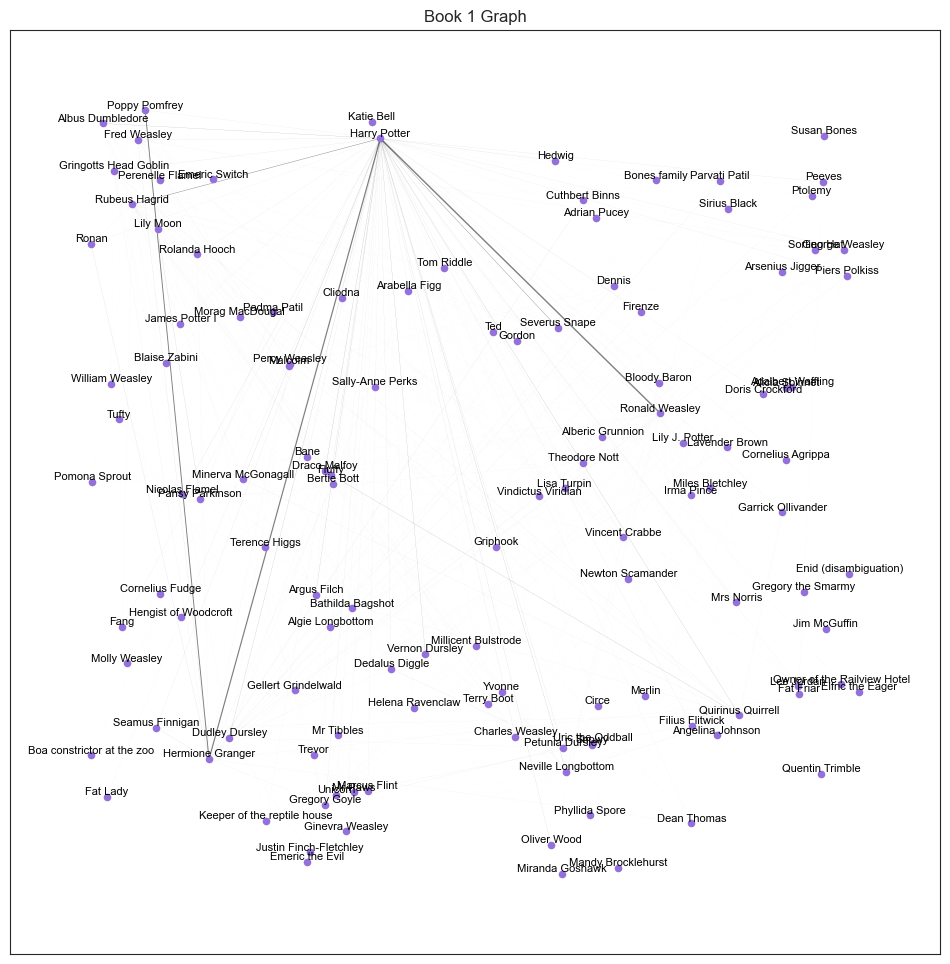

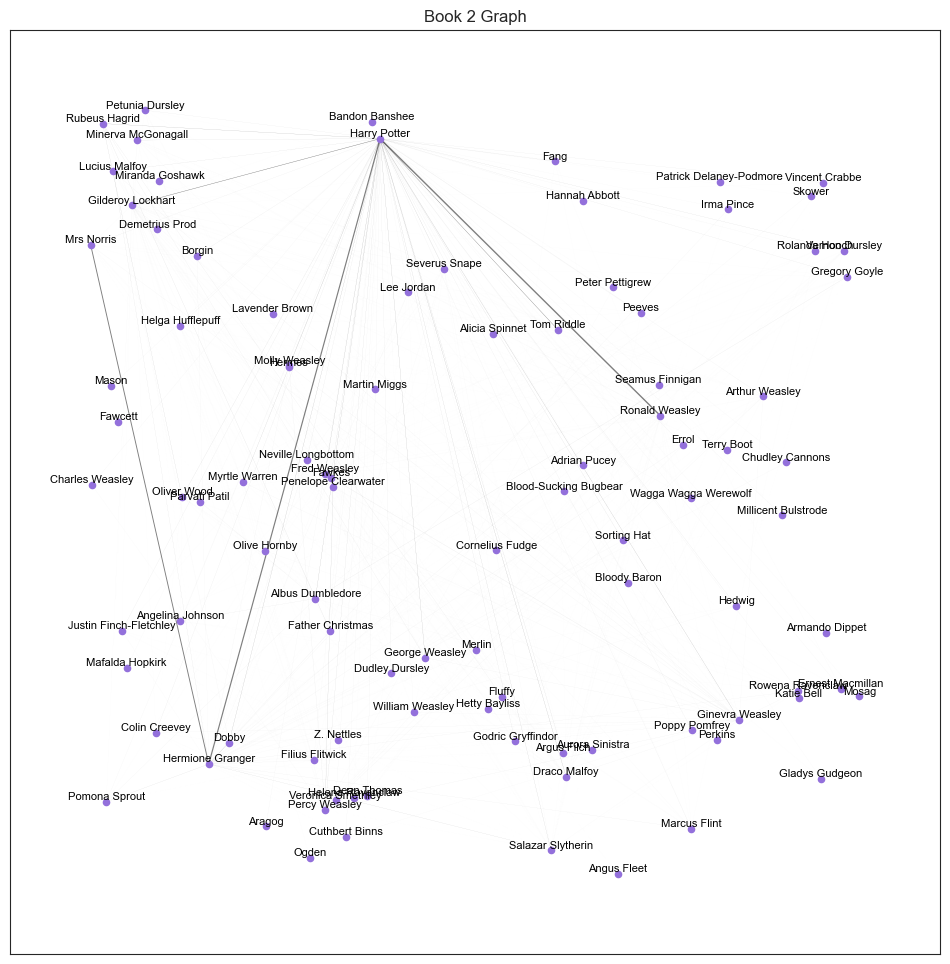

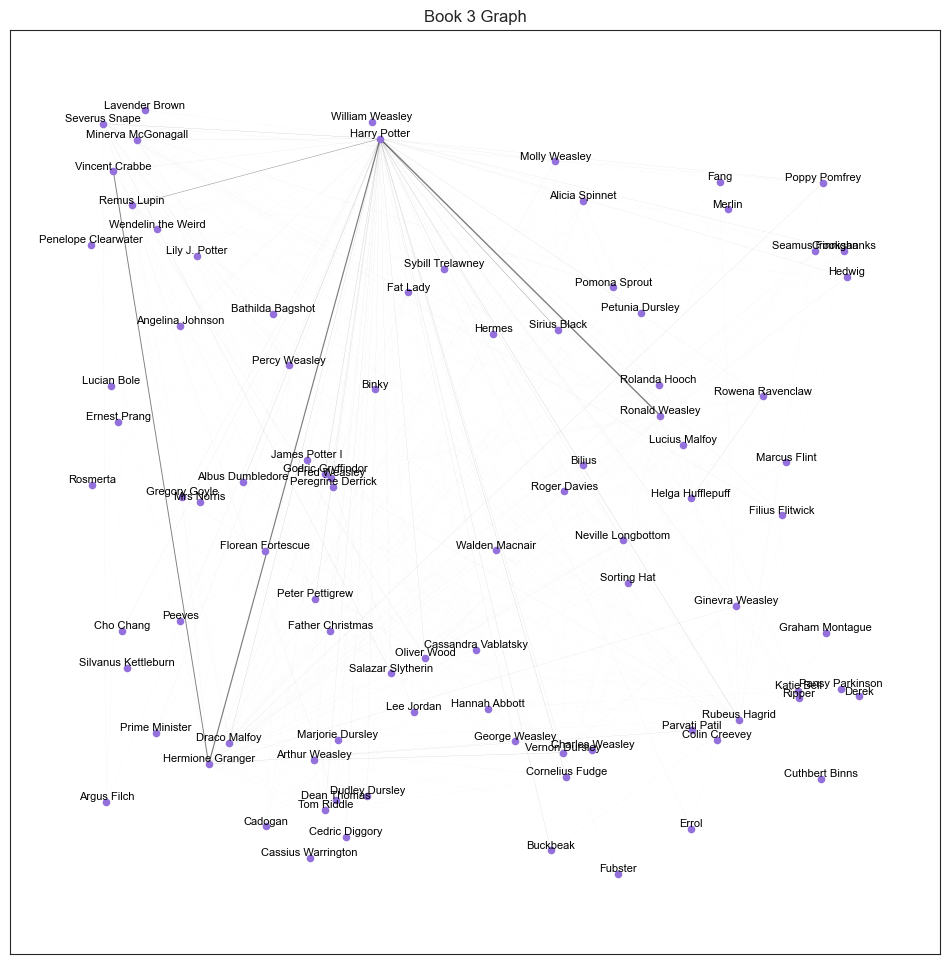

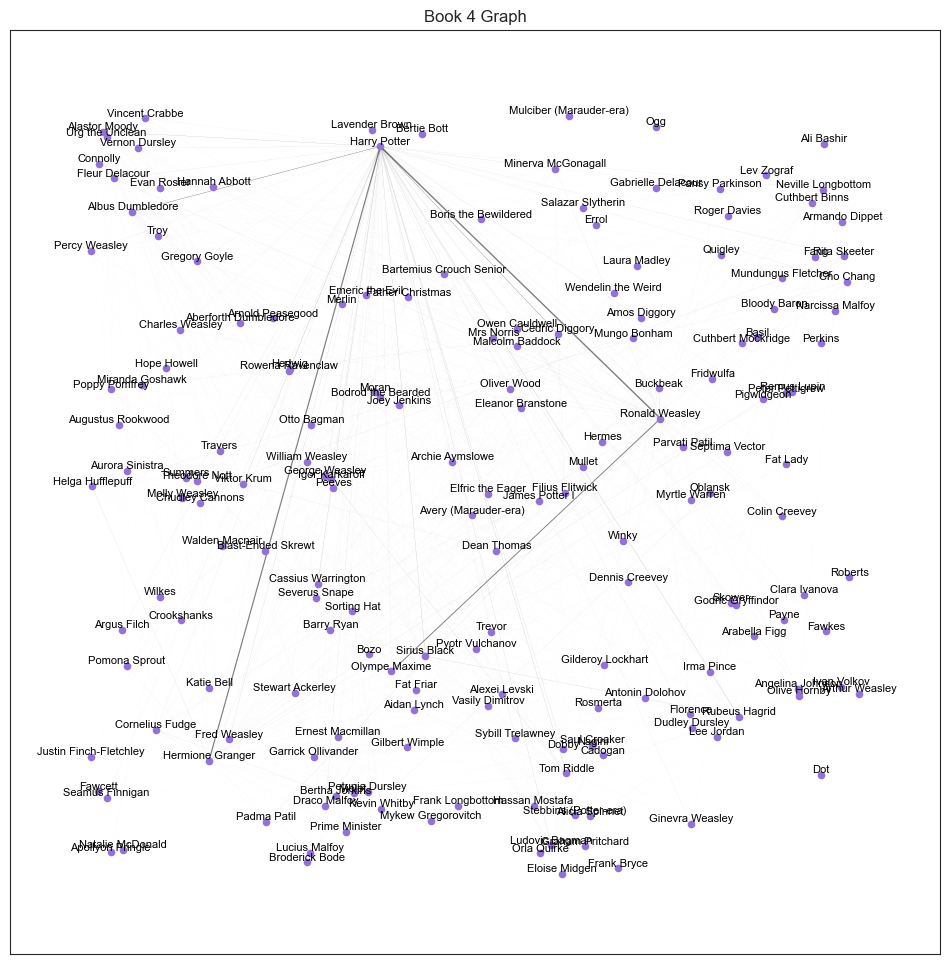

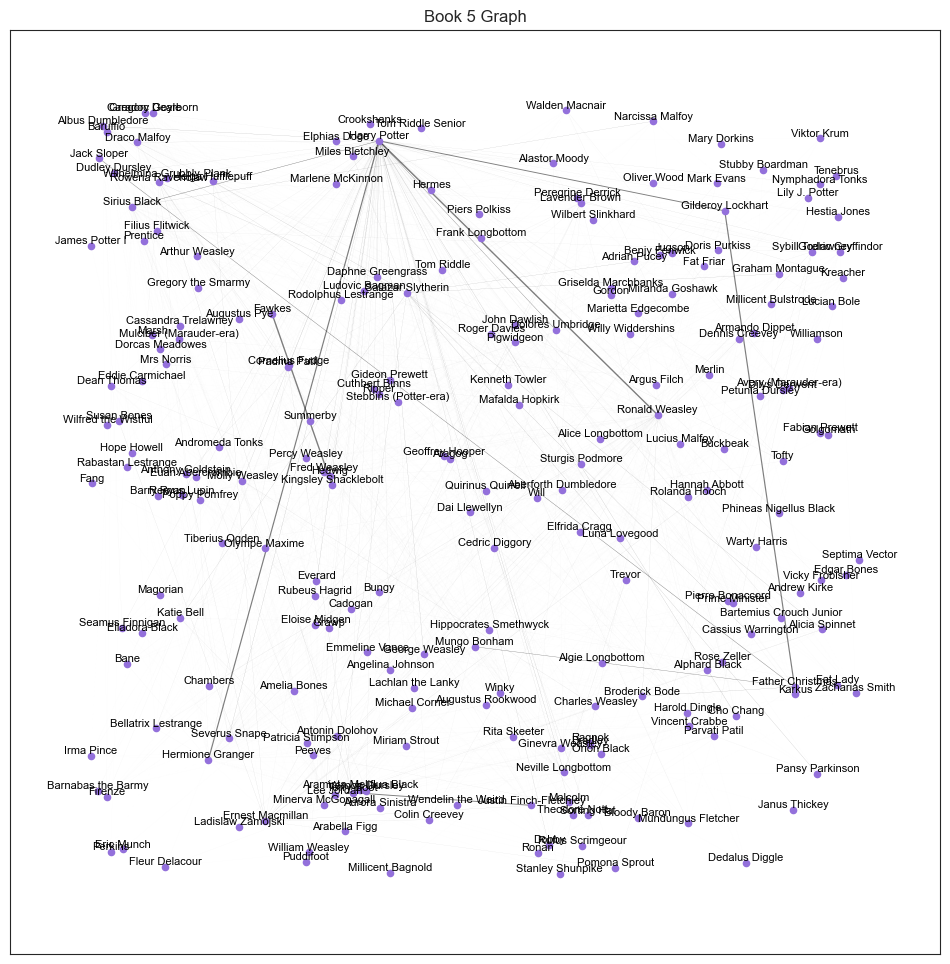

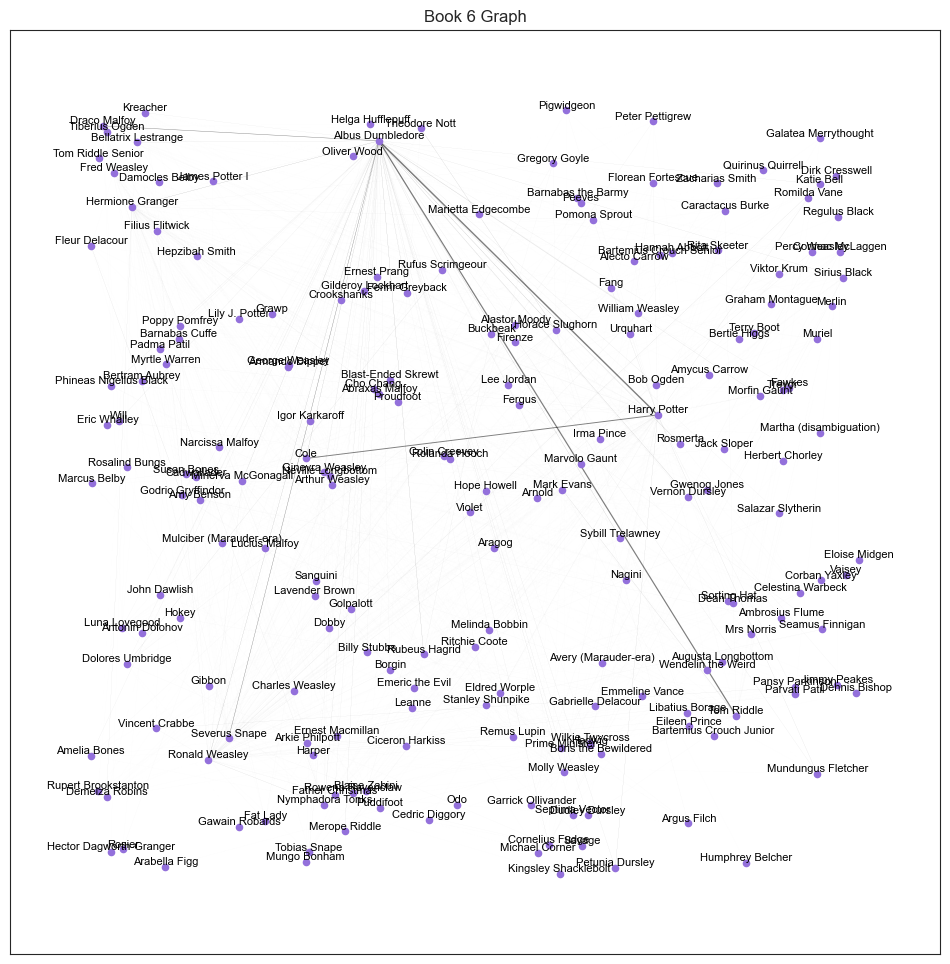

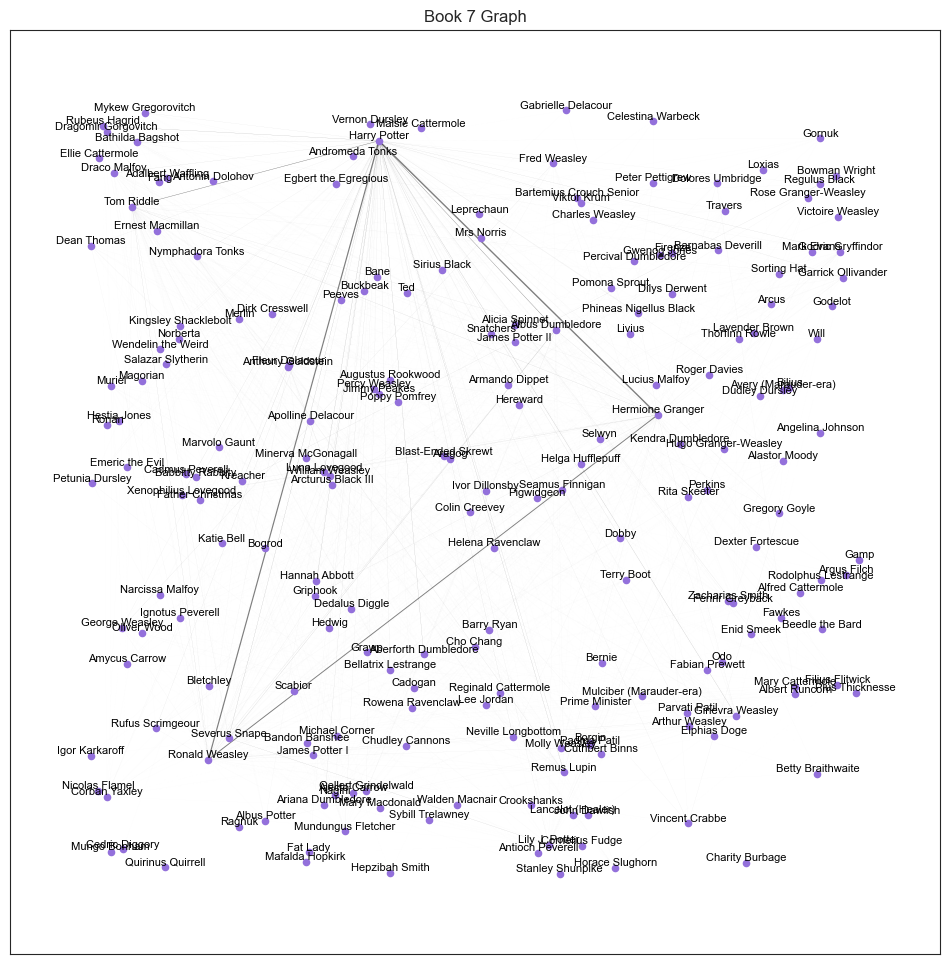

In [325]:
plot_graph(book1, 'Book 1 Graph')
plot_graph(book2, 'Book 2 Graph')
plot_graph(book3, 'Book 3 Graph')
plot_graph(book4, 'Book 4 Graph')
plot_graph(book5, 'Book 5 Graph')
plot_graph(book6, 'Book 6 Graph')
plot_graph(book7, 'Book 7 Graph')

### 2) Provide a statistical summary for each graph (number of nodes, edges, average degree, etc.)

In [302]:
def stat_summary(G):
    
      
    print("a) No. of nodes: ", G.number_of_nodes())
    
    print("b) No. of edges: ", G.number_of_edges())
    
    print("c) Density: ", nx.density(G))
    
    # calculate the average degree connectivity
    degree_connectivity = nx.average_degree_connectivity(G)

    # calculate the average degree
    average_degree = sum(dict(G.degree()).values()) / len(G)

    print("d) Average Degree: ", average_degree)
    
    print("e) Average Clustering Coefficient: ", nx.average_clustering(G))
    
    # check if the graph is connected
    
    if nx.is_connected(G):
        
        print("f) Graph is connected.")
        
    else:
        
        disconnected_components = nx.connected_components(G)
        num_disconnected_components = len(list(disconnected_components))
        print("g) Graph is not connected. Number of components: ", num_disconnected_components)
    
    print("h) Assortativity:", nx.degree_assortativity_coefficient(G))
    
    print("i) Degree Distribution:")
   
    # degree histogram
    degree_hist = nx.degree_histogram(G)

    plt.figure(figsize=(10, 3))
    plt.bar(range(len(degree_hist)), degree_hist, width=0.8, color='mediumpurple')
    plt.xlabel('Degree')
    plt.ylabel('Frequency')
    #plt.title('Degree Distribution')
    plt.show()


    

All Books:

a) No. of nodes:  478
b) No. of edges:  4213
c) Density:  0.036955167846460184
d) Average Degree:  17.627615062761507
e) Average Clustering Coefficient:  0.6410692469121497
g) Graph is not connected. Number of components:  6
h) Assortativity: -0.27819495407945294
i) Degree Distribution:


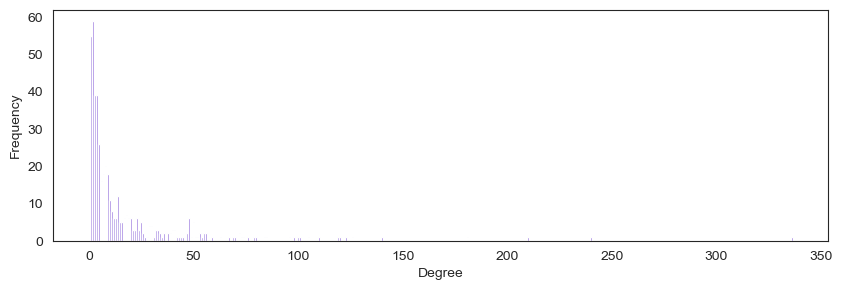

Book 1:

a) No. of nodes:  122
b) No. of edges:  475
c) Density:  0.06435442351984826
d) Average Degree:  7.786885245901639
e) Average Clustering Coefficient:  0.6080597842725013
g) Graph is not connected. Number of components:  3
h) Assortativity: -0.2748838860924061
i) Degree Distribution:


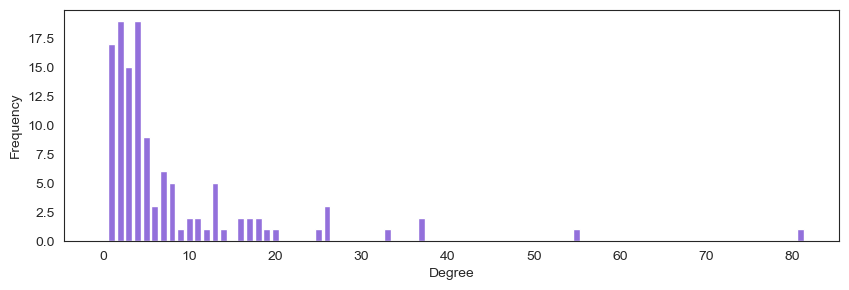

Book 2:

a) No. of nodes:  96
b) No. of edges:  534
c) Density:  0.11710526315789474
d) Average Degree:  11.125
e) Average Clustering Coefficient:  0.6192241163615557
g) Graph is not connected. Number of components:  3
h) Assortativity: -0.3555467427763561
i) Degree Distribution:


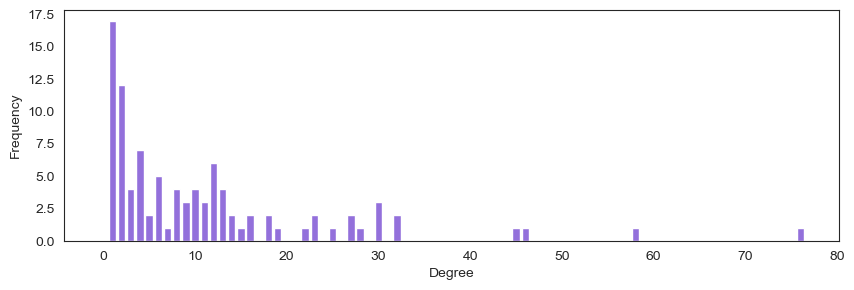

Book 3:

a) No. of nodes:  90
b) No. of edges:  645
c) Density:  0.16104868913857678
d) Average Degree:  14.333333333333334
e) Average Clustering Coefficient:  0.6825608856066592
f) Graph is connected.
h) Assortativity: -0.27946732264520685
i) Degree Distribution:


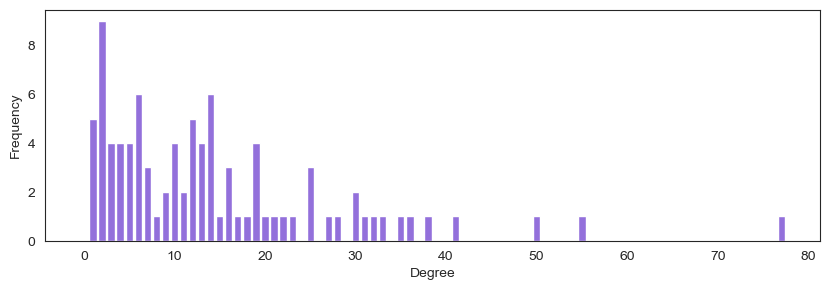

Book 4:

a) No. of nodes:  178
b) No. of edges:  1156
c) Density:  0.073382847711547
d) Average Degree:  12.98876404494382
e) Average Clustering Coefficient:  0.6246326210799821
g) Graph is not connected. Number of components:  3
h) Assortativity: -0.2717201574386016
i) Degree Distribution:


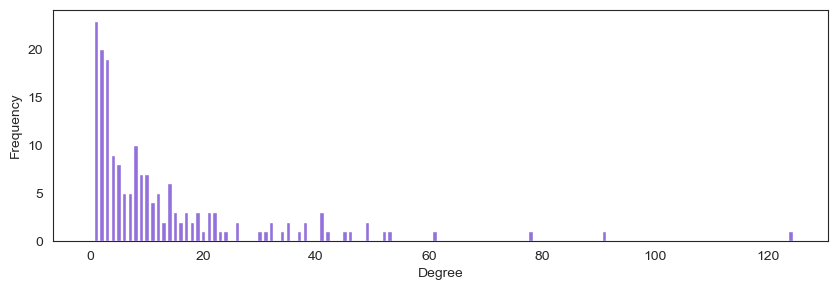

Book 5:

a) No. of nodes:  223
b) No. of edges:  1605
c) Density:  0.06484062537874197
d) Average Degree:  14.394618834080717
e) Average Clustering Coefficient:  0.6129052211639406
g) Graph is not connected. Number of components:  2
h) Assortativity: -0.2933643498125129
i) Degree Distribution:


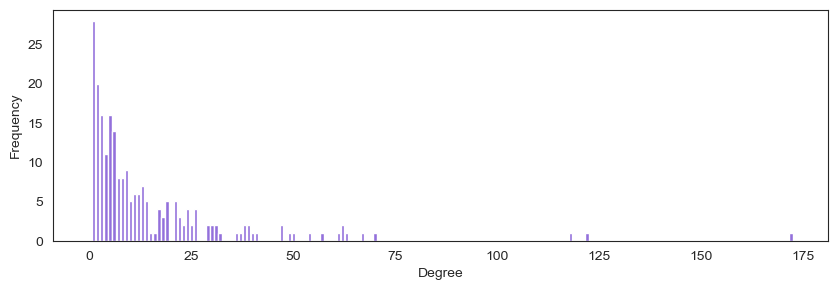

Book 6:

a) No. of nodes:  198
b) No. of edges:  1195
c) Density:  0.06127262472440138
d) Average Degree:  12.070707070707071
e) Average Clustering Coefficient:  0.6874179524999747
f) Graph is connected.
h) Assortativity: -0.3434445482556884
i) Degree Distribution:


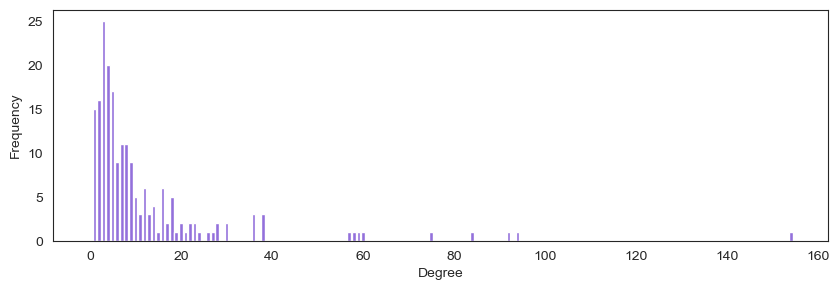

Book 7:

a) No. of nodes:  204
b) No. of edges:  1385
c) Density:  0.06688882449531537
d) Average Degree:  13.57843137254902
e) Average Clustering Coefficient:  0.639700935002776
g) Graph is not connected. Number of components:  2
h) Assortativity: -0.2706438850747661
i) Degree Distribution:


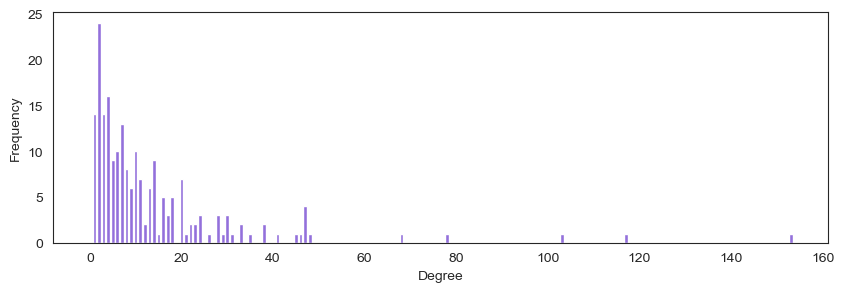

In [303]:
print("All Books:\n")
stat_summary(allbooks)
print("Book 1:\n")
stat_summary(book1)
print("Book 2:\n")
stat_summary(book2)
print("Book 3:\n")
stat_summary(book3)
print("Book 4:\n")
stat_summary(book4)
print("Book 5:\n")
stat_summary(book5)
print("Book 6:\n")
stat_summary(book6)
print("Book 7:\n")
stat_summary(book7)


## Question 2. Centrality Analysis

### 1) For the interaction network of each book, compute the following centrality metrics for all characters

In [331]:
def normalize(dictionary):

    max_val = max(dictionary.values())
    normalized = {node: value / max_val for node, value in dictionary.items()}
    
    normalized = {key: round(value, 5) for key, value in normalized.items()}
 
    return normalized


def top_10(dictionary):
    
    normalized = normalize(dictionary)
    
    return dict(sorted(normalized.items(), key=lambda x: x[1], reverse=True)[:10])


def centrality_calc(G, flag):

    degree = nx.degree_centrality(G)

    # Calculate the weighted degree centrality
    weighted = {}

    for node in G.nodes():
        weighted_degree = sum(G[node][neighbor]['weight'] for neighbor in G.neighbors(node))
        weighted[node] = weighted_degree

    betweenness = nx.betweenness_centrality(G)

    closeness = nx.closeness_centrality(G)

    eigenvector = nx.eigenvector_centrality(G)

    pagerank = nx.pagerank(G)
    
    
    # get all character centrality
    if flag == 0:
        
        degree = normalize(degree)

        weighted = normalize(weighted)

        betweenness = normalize(betweenness)

        closeness = normalize(closeness)

        eigenvector = normalize(eigenvector)

        pagerank = normalize(pagerank)
        
        
    # get top 10 character centrality
    else:
        
        degree = top_10(degree)
        
        weighted = top_10(weighted)

        betweenness = top_10(betweenness)

        closeness = top_10(closeness)

        eigenvector = top_10(eigenvector)

        pagerank = top_10(pagerank)
    
    return degree, weighted, betweenness, closeness, eigenvector, pagerank

In [337]:
degree0 = {}
weighted0 = {}
betweenness0 = {}
closeness0 = {}
eigenvector0 = {}
pagerank0 = {}

# iterate through each book and store centralities across all books
for graph_name, graph in ({'All Books': allbooks, 'Book1': book1, 'Book2': book2, 'Book3': book3, 'Book4': book4, 'Book5': book5, 'Book6': book6, 'Book7': book7}).items():
    
    d, w, b, c, e, p = centrality_calc(graph, 0)
    
    degree0[graph_name] = d
    weighted0[graph_name] = w
    betweenness0[graph_name] = b
    closeness0[graph_name] = c
    eigenvector0[graph_name] = e
    pagerank0[graph_name] = p

print("Degree: \n")    
for k, v in degree0.items(): 
    print(k,": " ,v, "\n\n")

print("Weighted: \n")    
for k, v in weighted0.items(): 
    print(k,": " ,v, "\n\n")
    
print("Betweenness: \n")    
for k, v in betweenness0.items(): 
    print(k,": " ,v, "\n\n")
    
print("Closeness: \n")    
for k, v in closeness0.items(): 
    print(k,": " ,v, "\n\n")
    
print("Eigenvector: \n")    
for k, v in eigenvector0.items(): 
    print(k,": " ,v, "\n\n")
    
print("Pagerank: \n")    
for k, v in pagerank0.items(): 
    print(k,": " ,v, "\n\n")

Degree: 

All Books :  {'Harry Potter': 1.0, 'Ronald Weasley': 0.71429, 'Hermione Granger': 0.625, 'Albus Dumbledore': 0.53869, 'Rubeus Hagrid': 0.375, 'Tom Riddle': 0.41667, 'Severus Snape': 0.36607, 'Sirius Black': 0.28571, 'Draco Malfoy': 0.32738, 'Fred Weasley': 0.3006, 'George Weasley': 0.29167, 'Ginevra Weasley': 0.35714, 'Neville Longbottom': 0.29762, 'Remus Lupin': 0.25, 'Molly Weasley': 0.22619, 'Cho Chang': 0.15774, 'Dolores Umbridge': 0.2381, 'Godric Gryffindor': 0.35417, 'Dobby': 0.14286, 'Minerva McGonagall': 0.3125, 'Cedric Diggory': 0.15476, 'Alastor Moody': 0.20833, 'Horace Slughorn': 0.23512, 'Vernon Dursley': 0.13988, 'Luna Lovegood': 0.21726, 'Dudley Dursley': 0.09821, 'Hedwig': 0.12202, 'Gregory Goyle': 0.14286, 'Vincent Crabbe': 0.16667, 'Sybill Trelawney': 0.12202, 'Cornelius Fudge': 0.22024, 'Argus Filch': 0.14881, 'Percy Weasley': 0.25298, 'Kreacher': 0.11905, 'Gilderoy Lockhart': 0.14881, 'Prime Minister': 0.1756, 'Viktor Krum': 0.14286, 'Nymphadora Tonks': 0.1

### 2) Visualize and discuss the evolution of top 10 characters’ centrality across the series

In [333]:
degree = {}
weighted = {}
betweenness = {}
closeness = {}
eigenvector = {}
pagerank = {}

# iterate through each book and store centralities across all books
for graph_name, graph in ({'Book1': book1, 'Book2': book2, 'Book3': book3, 'Book4': book4, 'Book5': book5, 'Book6': book6, 'Book7': book7}).items():
    
    d, w, b, c, e, p = centrality_calc(graph, 1)
    
    degree[graph_name] = d
    weighted[graph_name] = w
    betweenness[graph_name] = b
    closeness[graph_name] = c
    eigenvector[graph_name] = e
    pagerank[graph_name] = p

print("Degree: \n")    
for k, v in degree.items(): 
    print(k,": " ,v, "\n\n")

print("Weighted: \n")    
for k, v in weighted.items(): 
    print(k,": " ,v, "\n\n")
    
print("Betweenness: \n")    
for k, v in betweenness.items(): 
    print(k,": " ,v, "\n\n")
    
print("Closeness: \n")    
for k, v in closeness.items(): 
    print(k,": " ,v, "\n\n")
    
print("Eigenvector: \n")    
for k, v in eigenvector.items(): 
    print(k,": " ,v, "\n\n")
    
print("Pagerank: \n")    
for k, v in pagerank.items(): 
    print(k,": " ,v, "\n\n")

Degree: 

Book1 :  {'Harry Potter': 1.0, 'Ronald Weasley': 0.67901, 'Hermione Granger': 0.45679, 'Rubeus Hagrid': 0.45679, 'Albus Dumbledore': 0.40741, 'Severus Snape': 0.32099, 'Draco Malfoy': 0.32099, 'Neville Longbottom': 0.32099, 'Minerva McGonagall': 0.30864, 'Percy Weasley': 0.24691} 


Book2 :  {'Harry Potter': 1.0, 'Ronald Weasley': 0.76316, 'Hermione Granger': 0.60526, 'Gilderoy Lockhart': 0.59211, 'Fred Weasley': 0.42105, 'Salazar Slytherin': 0.42105, 'George Weasley': 0.39474, 'Draco Malfoy': 0.39474, 'Albus Dumbledore': 0.39474, 'Ginevra Weasley': 0.36842} 


Book3 :  {'Harry Potter': 1.0, 'Ronald Weasley': 0.71429, 'Hermione Granger': 0.64935, 'Godric Gryffindor': 0.53247, 'Sirius Black': 0.49351, 'Draco Malfoy': 0.46753, 'Remus Lupin': 0.45455, 'Albus Dumbledore': 0.42857, 'Salazar Slytherin': 0.41558, 'Rubeus Hagrid': 0.4026} 


Book4 :  {'Harry Potter': 1.0, 'Ronald Weasley': 0.73387, 'Hermione Granger': 0.62903, 'Albus Dumbledore': 0.49194, 'Ludovic Bagman': 0.42742, '

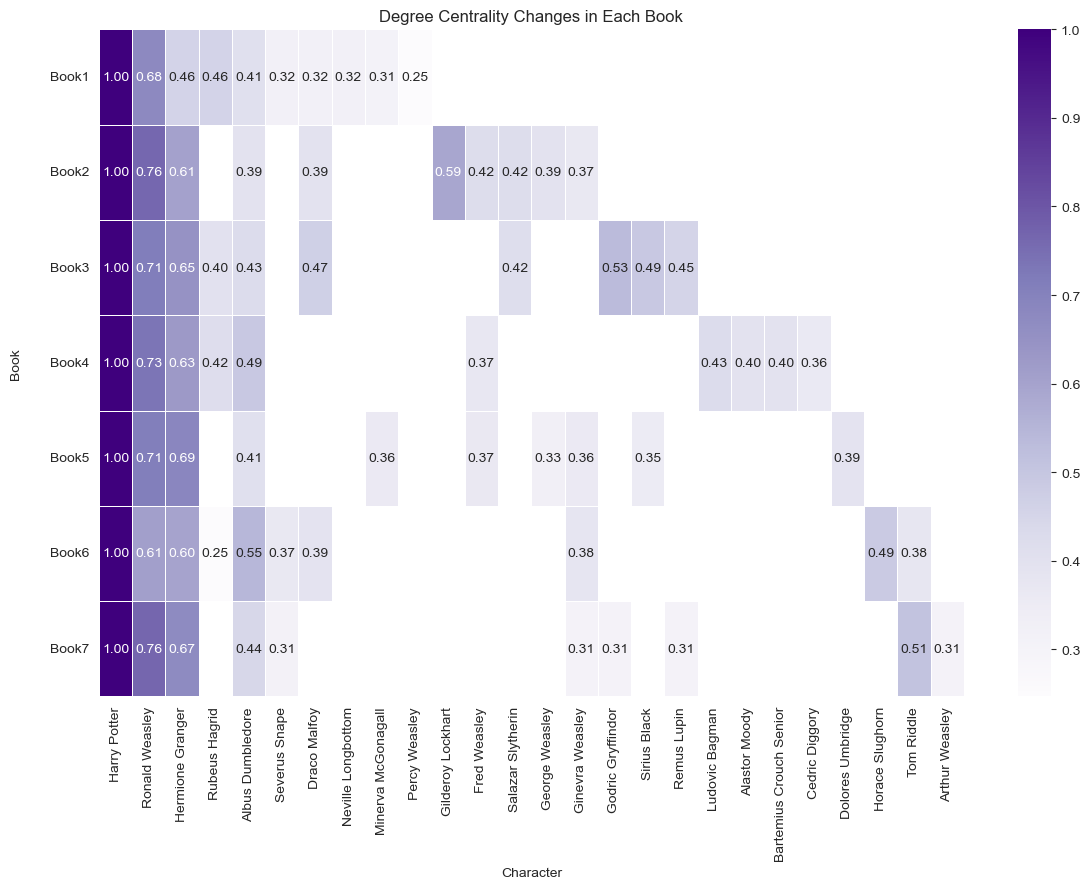

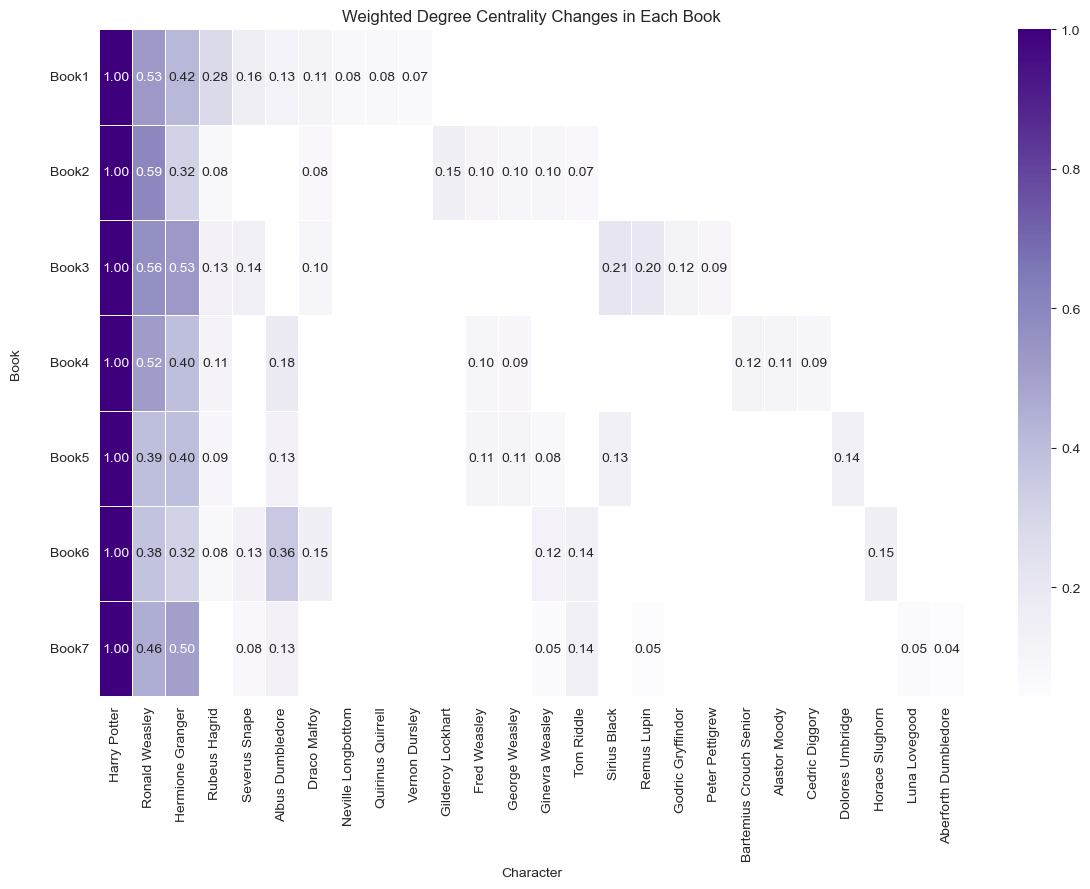

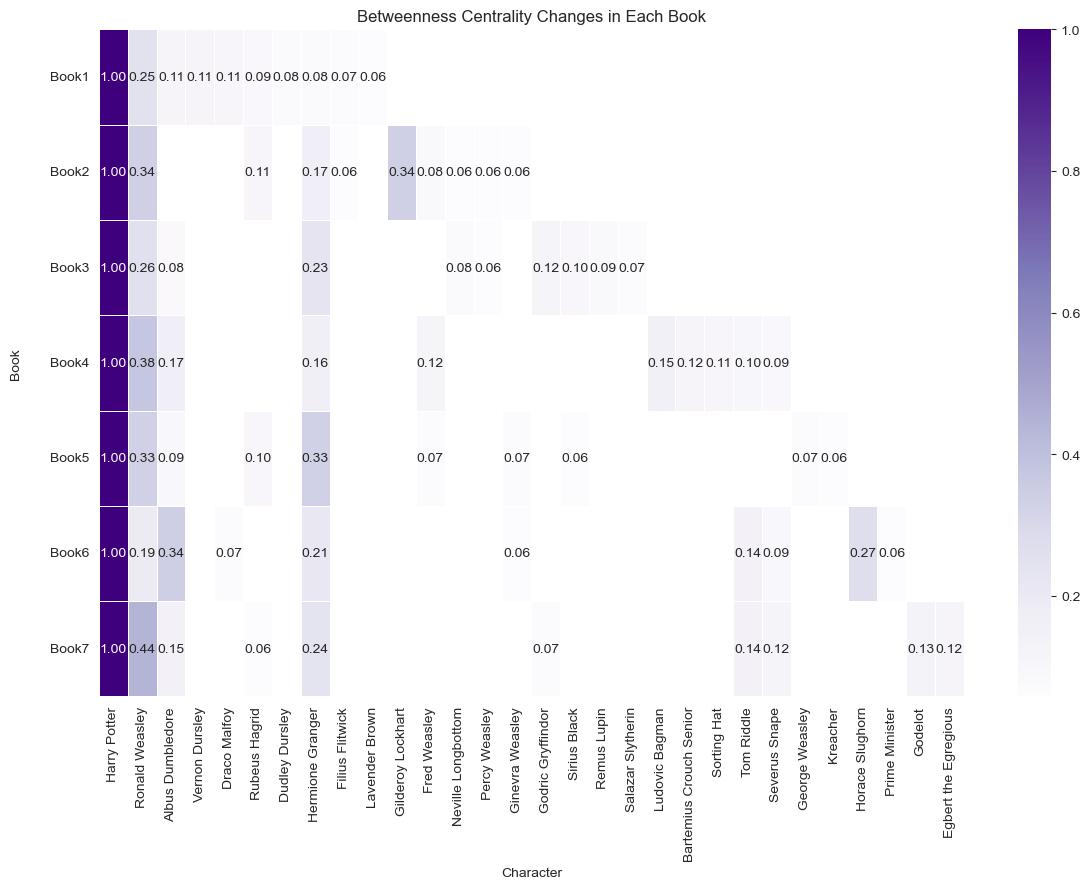

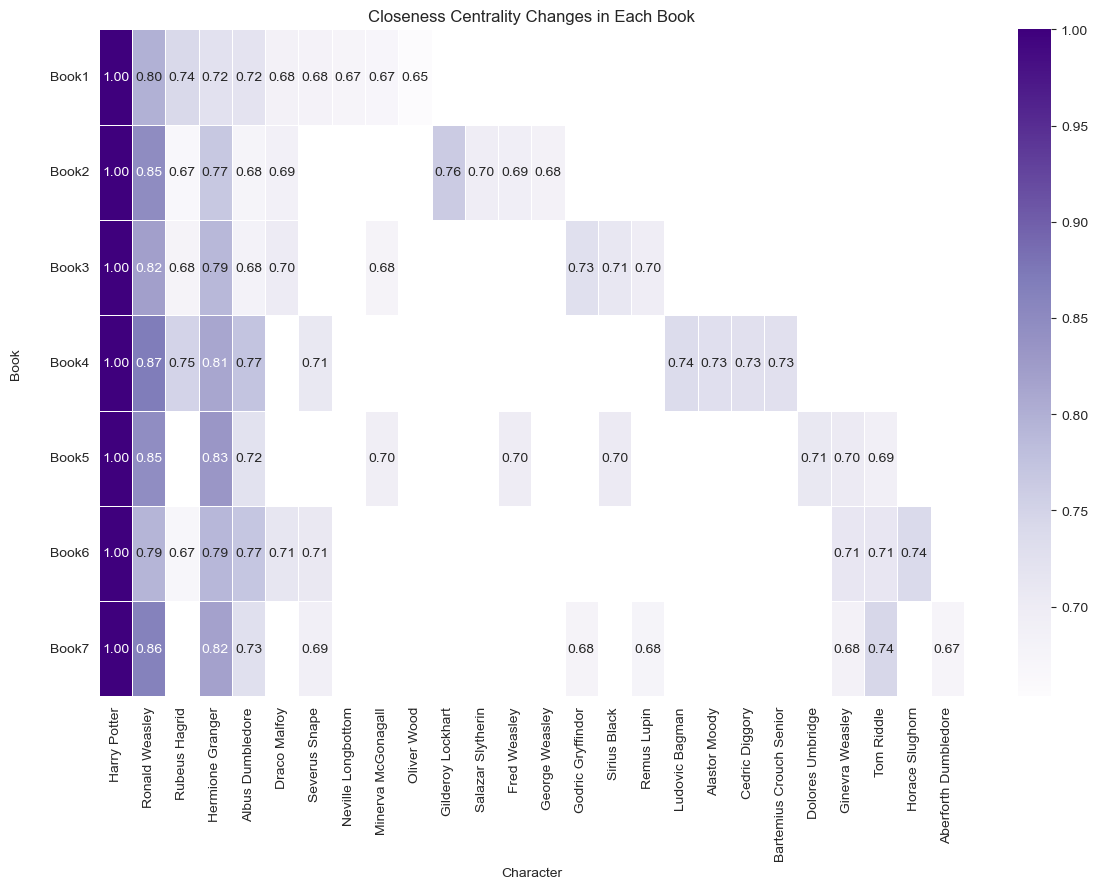

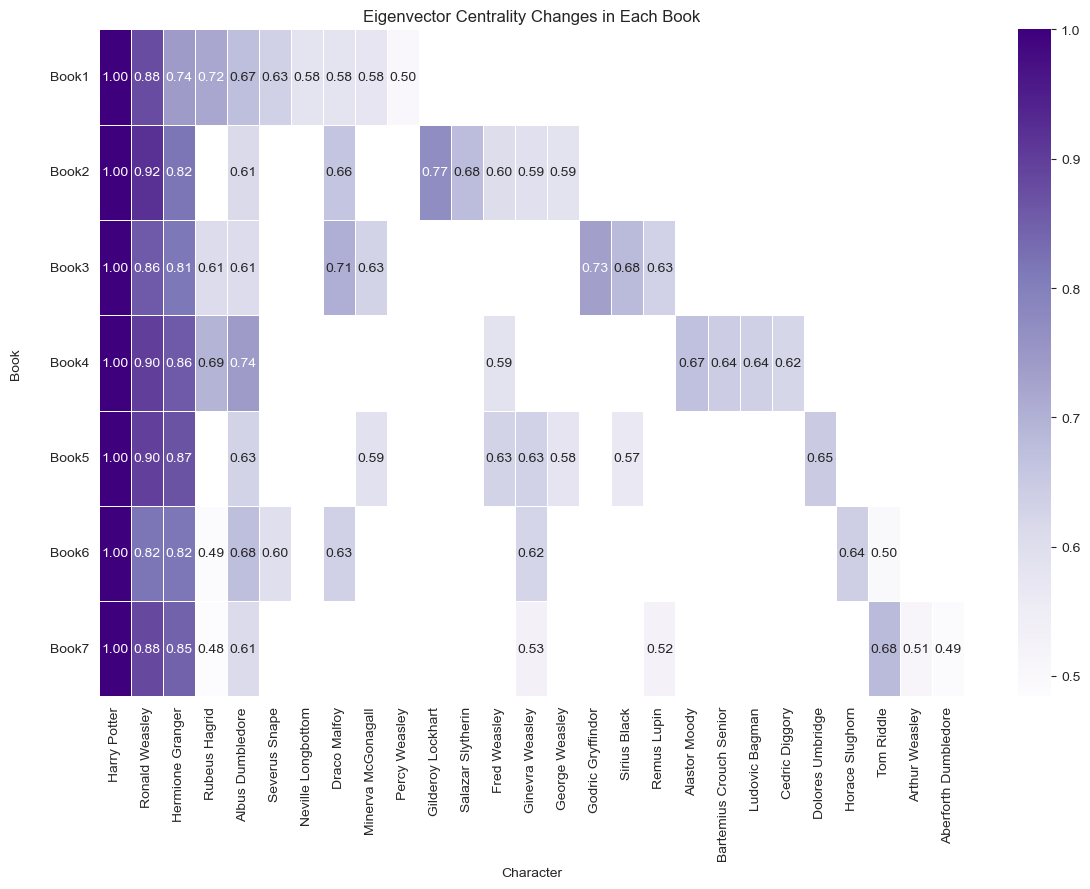

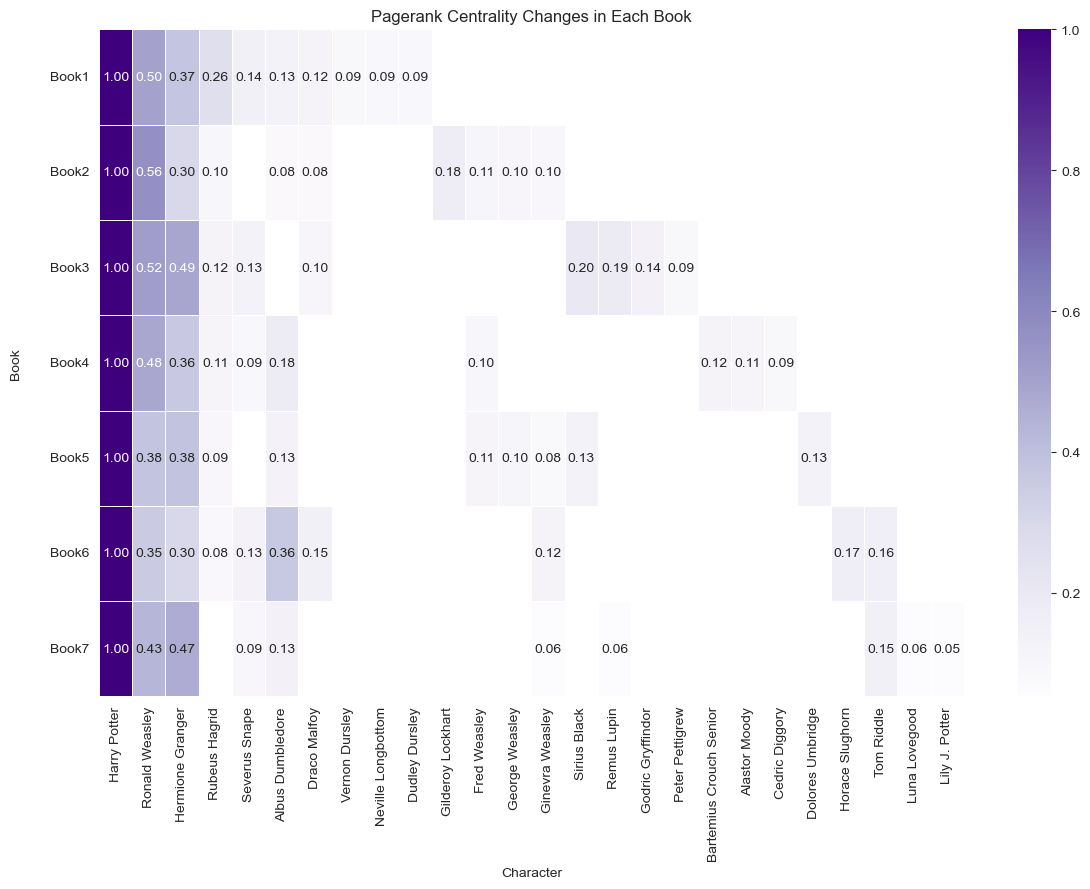

In [334]:
def plot_centrality(centrality, title):
    # dataframe from the dictionary
    df = pd.DataFrame.from_dict(centrality, orient='index')

    plt.figure(figsize=(12, 9))
    sns.heatmap(df, cmap='Purples', annot=True, fmt=".2f", cbar=True, linewidths=0.5)
    plt.title(f'{title} Centrality Changes in Each Book')
    plt.xlabel('Character')
    plt.ylabel('Book', labelpad = 20)
    plt.xticks(rotation=90)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()
    
plot_centrality(degree, 'Degree')
plot_centrality(weighted, 'Weighted Degree')
plot_centrality(betweenness, 'Betweenness')
plot_centrality(closeness, 'Closeness')
plot_centrality(eigenvector, 'Eigenvector')
plot_centrality(pagerank, 'Pagerank')

### 3) Examine the trends in centrality measures across the series, noting any significant increases or decreases. Relate these trends to the characters’ narrative arcs, particularly during their introduc- tion, peak involvement, and eventual departure from the storyline.

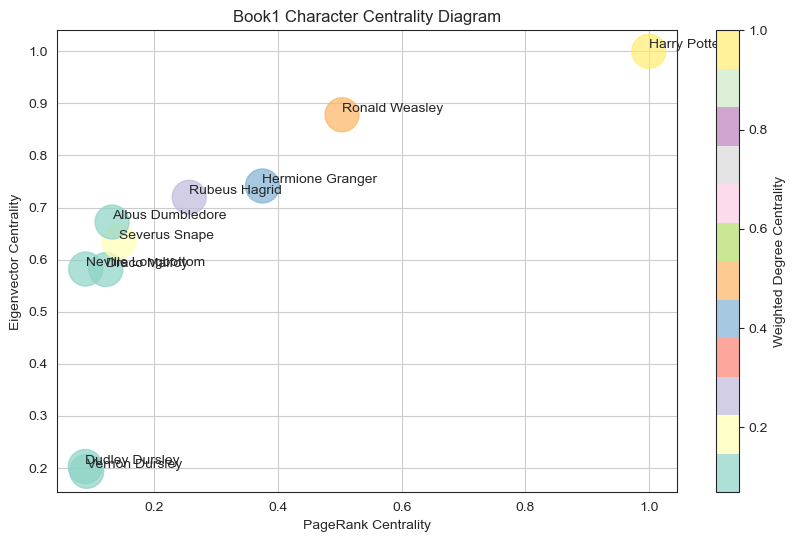

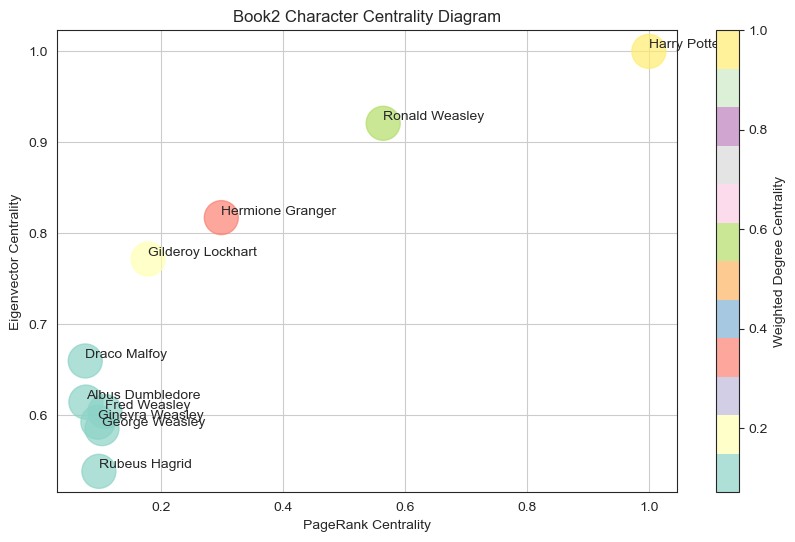

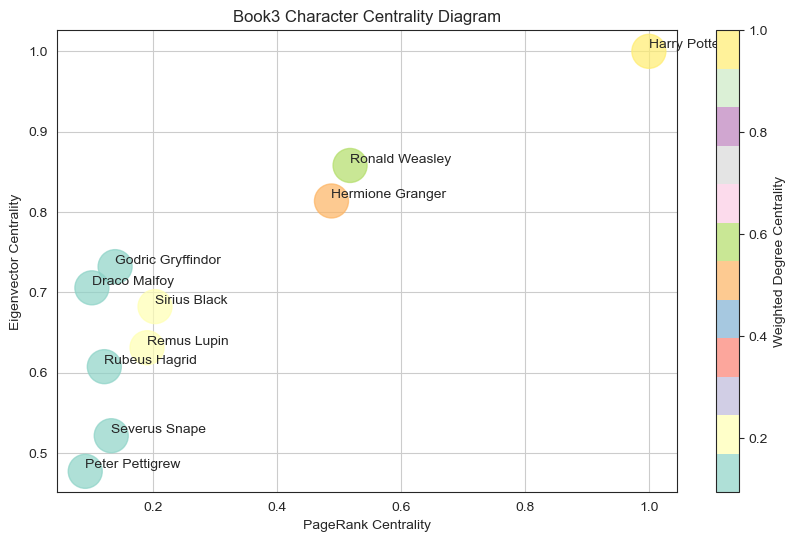

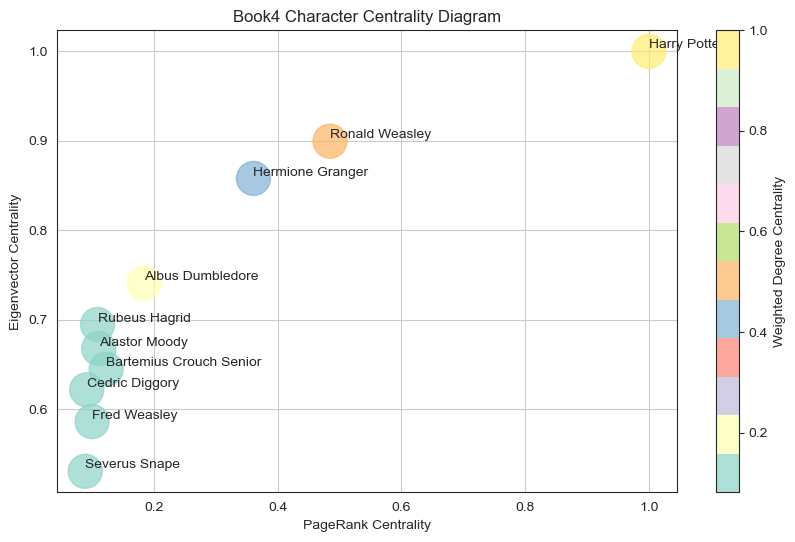

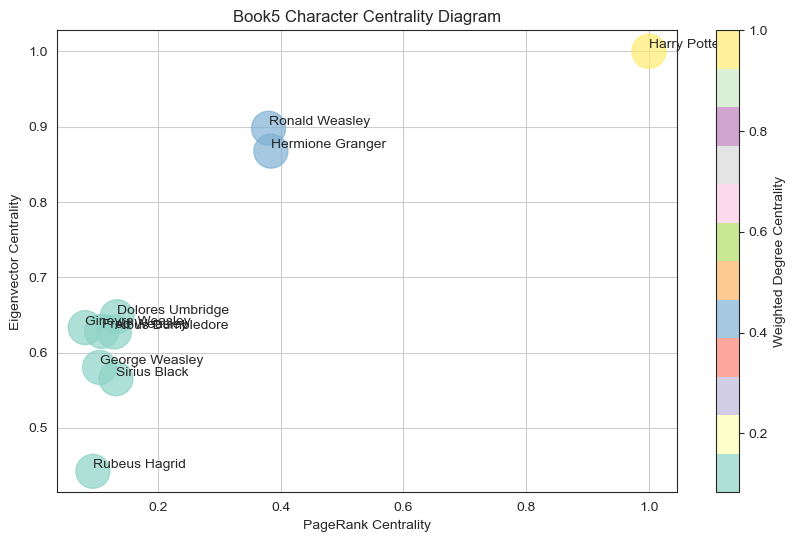

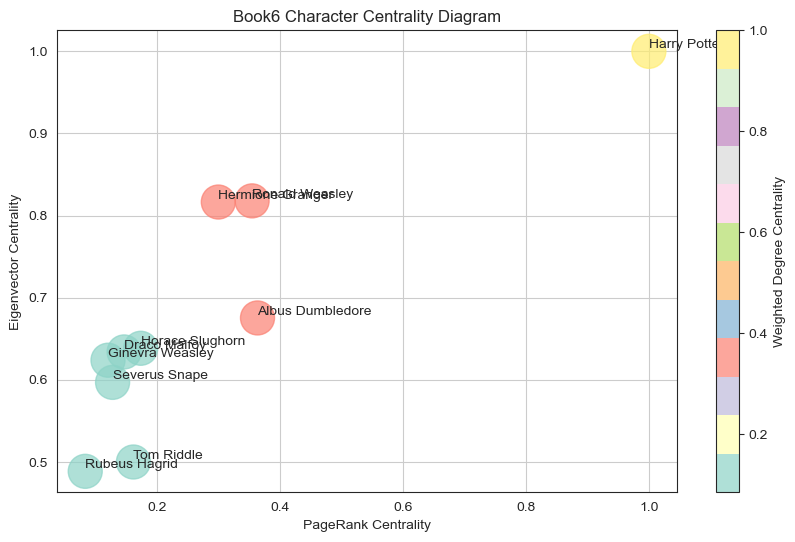

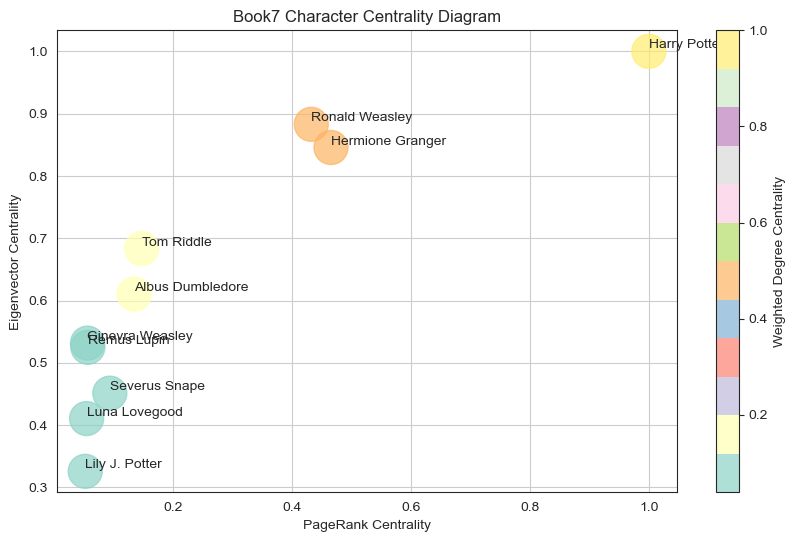

In [335]:
def character_analysis_by_book(book_name):
    
    #top 10 common characters in PageRank, Eigenvector, and Weighted Degree dictionaries
    top_characters = set(pagerank[book_name].keys())

    # initialize lists to store centrality values
    page_rank = []
    eigen_vector = []
    weighted_degree = []
    character_names = []

    # extract centrality scores for top characters
    for character in top_characters:
        page_rank.append(pagerank[book_name][character])
        eigen_vector.append(eigenvector0[book_name][character])
        weighted_degree.append(weighted0[book_name][character])
        character_names.append(character)
    
    plt.figure(figsize=(10, 6))
    plt.scatter(page_rank, eigen_vector, c=weighted_degree, cmap='Set3', s=600, alpha=0.7)

    # add character names
    for i, name in enumerate(character_names):
        plt.text(page_rank[i], eigen_vector[i], name, fontsize=10, ha='left', va='bottom')

    # add color bar
    plt.colorbar(label='Weighted Degree Centrality')

    plt.xlabel('PageRank Centrality')
    plt.ylabel('Eigenvector Centrality')
    plt.title(f'{book_name} Character Centrality Diagram')
    plt.grid(True)
    plt.show()
    
for book_name in ['Book1', 'Book2', 'Book3', 'Book4', 'Book5', 'Book6', 'Book7']:
    character_analysis_by_book(book_name)

## Question 3. Community Detection

### 1) Visualize the resulting community structures, ensuring node size is scaled by each character’s PageRank and their label size is scaled by their Betweenness Centrality.

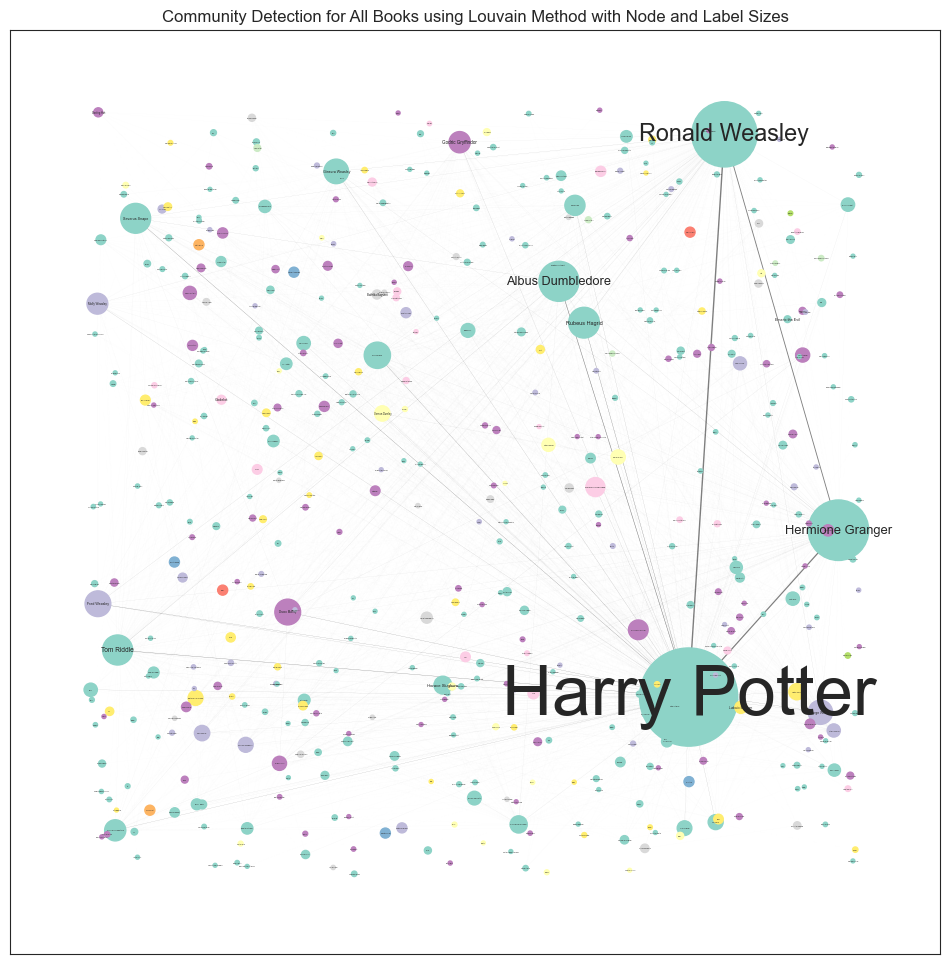

Community 0: ['Harry Potter', 'Ronald Weasley', 'Hermione Granger', 'Rubeus Hagrid', 'Ginevra Weasley', 'Neville Longbottom', 'Cho Chang', 'Dobby', 'Cedric Diggory', 'Luna Lovegood', 'Hedwig', 'Sybill Trelawney', 'Gilderoy Lockhart', 'Viktor Krum', 'Dean Thomas', 'Rufus Scrimgeour', 'Seamus Finnigan', 'Griphook', 'Lavender Brown', 'Rita Skeeter', 'Buckbeak', 'Father Christmas', 'Myrtle Warren', 'Garrick Ollivander', 'Fang', 'Cormac McLaggen', 'Crookshanks', 'Xenophilius Lovegood', 'Fat Lady', 'Parvati Patil', 'Mykew Gregorovitch', 'Pigwidgeon', 'Grawp', 'Eileen Prince', 'Firenze', 'Errol', 'Aragog', 'Nicolas Flamel', 'Bane', 'Demelza Robins', 'Gringotts Head Goblin', 'Stanley Shunpike', 'Tofty', 'Cuthbert Binns', 'Fluffy', 'Bogrod', 'Travers', 'Blast-Ended Skrewt', 'Cadogan', 'Snatchers', 'Beedle the Bard', 'Olive Hornby', 'Trevor', 'Chudley Cannons', 'Millicent Bulstrode', 'Irma Pince', 'Florean Fortescue', 'Ronan', 'Wendelin the Weird', 'Perkins', 'Bradley', 'Doris Crockford', 'Mafal

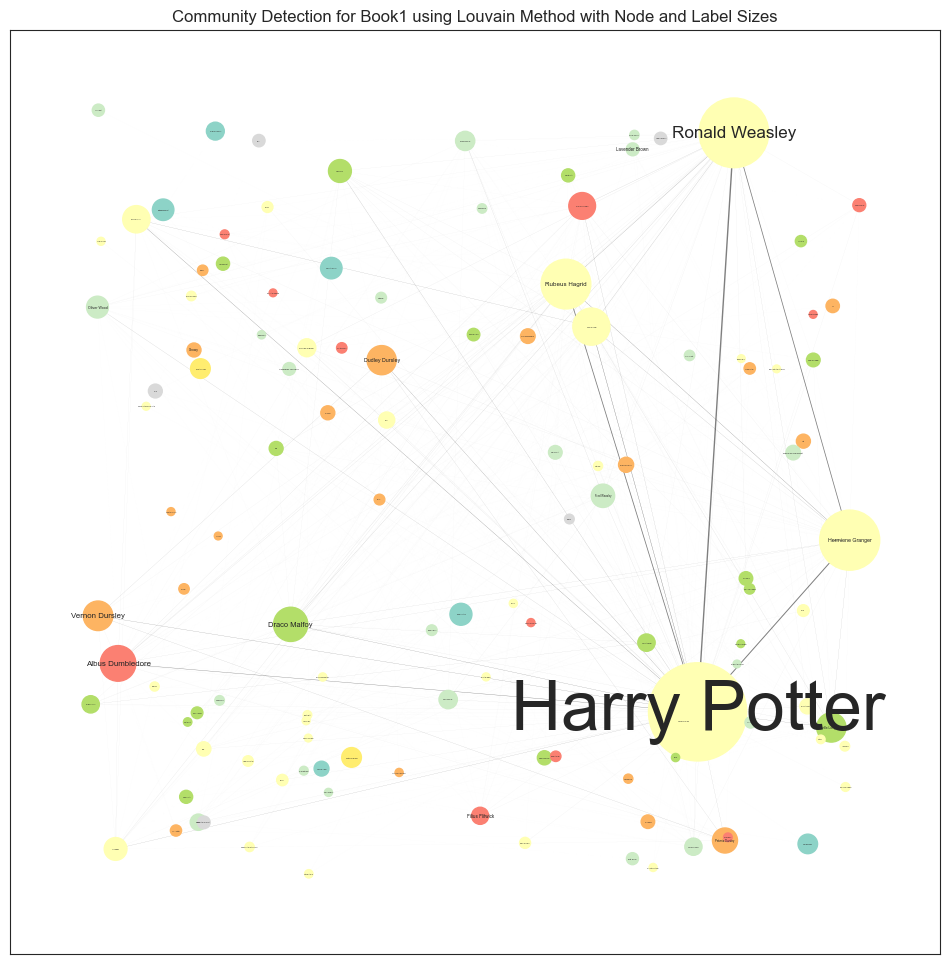

Community 1: ['Harry Potter', 'Ronald Weasley', 'Hermione Granger', 'Rubeus Hagrid', 'Severus Snape', 'Quirinus Quirrell', 'Tom Riddle', 'Nicolas Flamel', 'Gringotts Head Goblin', 'Fluffy', 'Hedwig', 'Dedalus Diggle', 'Bane', 'Ronan', 'Firenze', 'Doris Crockford', 'Ginevra Weasley', 'Algie Longbottom', 'Garrick Ollivander', 'Irma Pince', 'Griphook', 'Fat Lady', 'Bertie Bott', 'Keeper of the reptile house', 'Cuthbert Binns', 'Cornelius Agrippa', 'Unicorn', 'Terence Higgs', 'Owner of the Railview Hotel', 'Millicent Bulstrode', 'Lisa Turpin', 'Elfric the Eager', 'Ptolemy', 'Perenelle Flamel', 'Bones family', 'Boa constrictor at the zoo', 'Enid (disambiguation)']


Community 2: ['Albus Dumbledore', 'Minerva McGonagall', 'Poppy Pomfrey', 'Filius Flitwick', 'Sirius Black', 'Pomona Sprout', 'Helena Ravenclaw', 'Cornelius Fudge', 'Gellert Grindelwald', 'Emeric the Evil', 'Uric the Oddball']


Community 3: ['Dudley Dursley', 'Vernon Dursley', 'Petunia Dursley', 'Piers Polkiss', 'James Potter I'

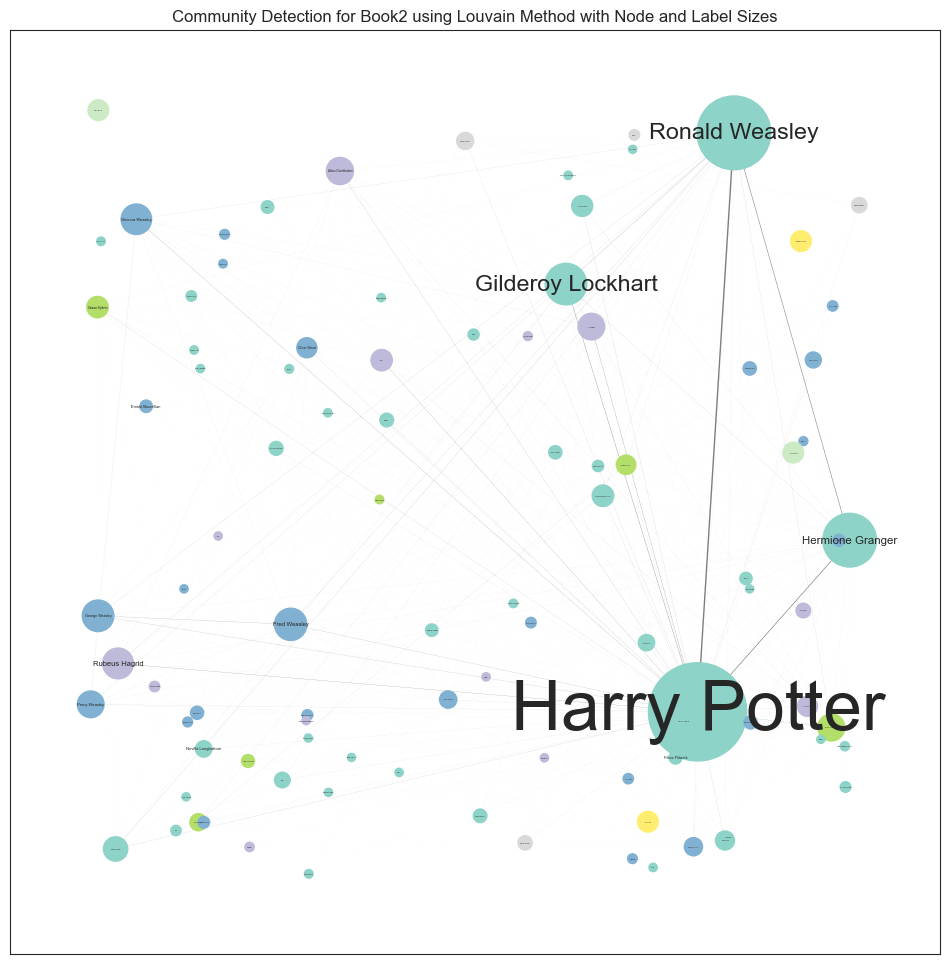

Community 0: ['Harry Potter', 'Ronald Weasley', 'Hermione Granger', 'Gilderoy Lockhart', 'Severus Snape', 'Myrtle Warren', 'Argus Filch', 'Minerva McGonagall', 'Sorting Hat', 'Fawkes', 'Fang', 'Justin Finch-Fletchley', 'Hedwig', 'Neville Longbottom', 'Borgin', 'Poppy Pomfrey', 'Peeves', 'Dean Thomas', 'Cuthbert Binns', 'Seamus Finnigan', 'Millicent Bulstrode', 'Errol', 'Wagga Wagga Werewolf', 'Pomona Sprout', 'Filius Flitwick', 'Hannah Abbott', 'Perkins', 'Chudley Cannons', 'Patrick Delaney-Podmore', 'Veronica Smethley', 'Olive Hornby', 'Irma Pince', 'Bandon Banshee', 'Merlin', 'Ogden', 'Mafalda Hopkirk', 'Lavender Brown', 'Martin Miggs', 'Aurora Sinistra', 'Bloody Baron', 'Gladys Gudgeon', 'Helena Ravenclaw', 'Skower', 'Terry Boot', 'Miranda Goshawk']


Community 1: ['Tom Riddle', 'Rubeus Hagrid', 'Dobby', 'Albus Dumbledore', 'Lucius Malfoy', 'Mrs Norris', 'Cornelius Fudge', 'Aragog', 'Armando Dippet', 'Blood-Sucking Bugbear', 'Parvati Patil', 'Mosag', 'Fluffy']


Community 2: ['Ginev

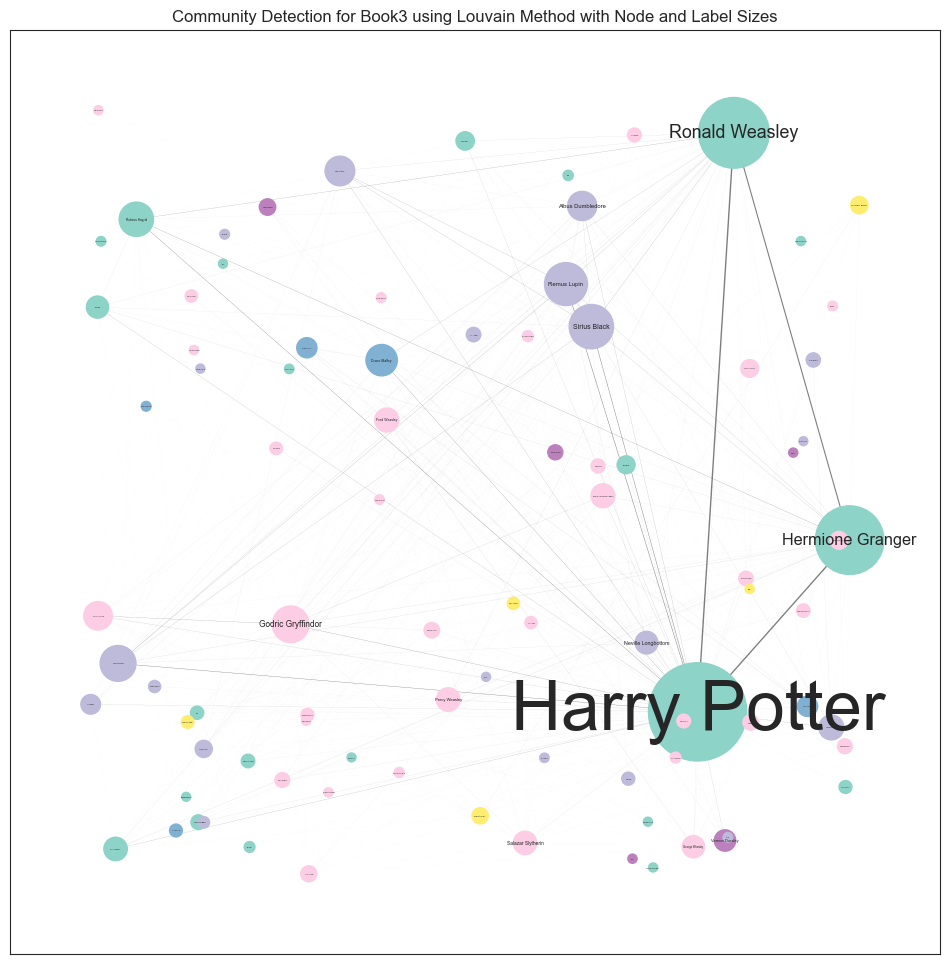

Community 0: ['Harry Potter', 'Ronald Weasley', 'Hermione Granger', 'Rubeus Hagrid', 'Sybill Trelawney', 'Buckbeak', 'Crookshanks', 'Hedwig', 'Poppy Pomfrey', 'Errol', 'Father Christmas', 'Filius Flitwick', 'Cadogan', 'Colin Creevey', 'Fang', 'Florean Fortescue', 'Cassandra Vablatsky', 'Bathilda Bagshot', 'Bilius', 'Wendelin the Weird', 'Marjorie Dursley', 'Sorting Hat']


Community 1: ['Remus Lupin', 'Sirius Black', 'Severus Snape', 'Cornelius Fudge', 'Peter Pettigrew', 'Albus Dumbledore', 'Tom Riddle', 'Neville Longbottom', 'Prime Minister', 'James Potter I', 'Lily J. Potter', 'Walden Macnair', 'Fat Lady', 'Merlin', 'Rosmerta', 'Peeves', 'Mrs Norris', 'Derek', 'Ernest Prang', 'Cuthbert Binns']


Community 2: ['Draco Malfoy', 'Gregory Goyle', 'Vincent Crabbe', 'Lucius Malfoy', 'Pansy Parkinson']


Community 3: ['Godric Gryffindor', 'Oliver Wood', 'Minerva McGonagall', 'Percy Weasley', 'Fred Weasley', 'George Weasley', 'Molly Weasley', 'Cho Chang', 'Salazar Slytherin', 'Ginevra Weasley

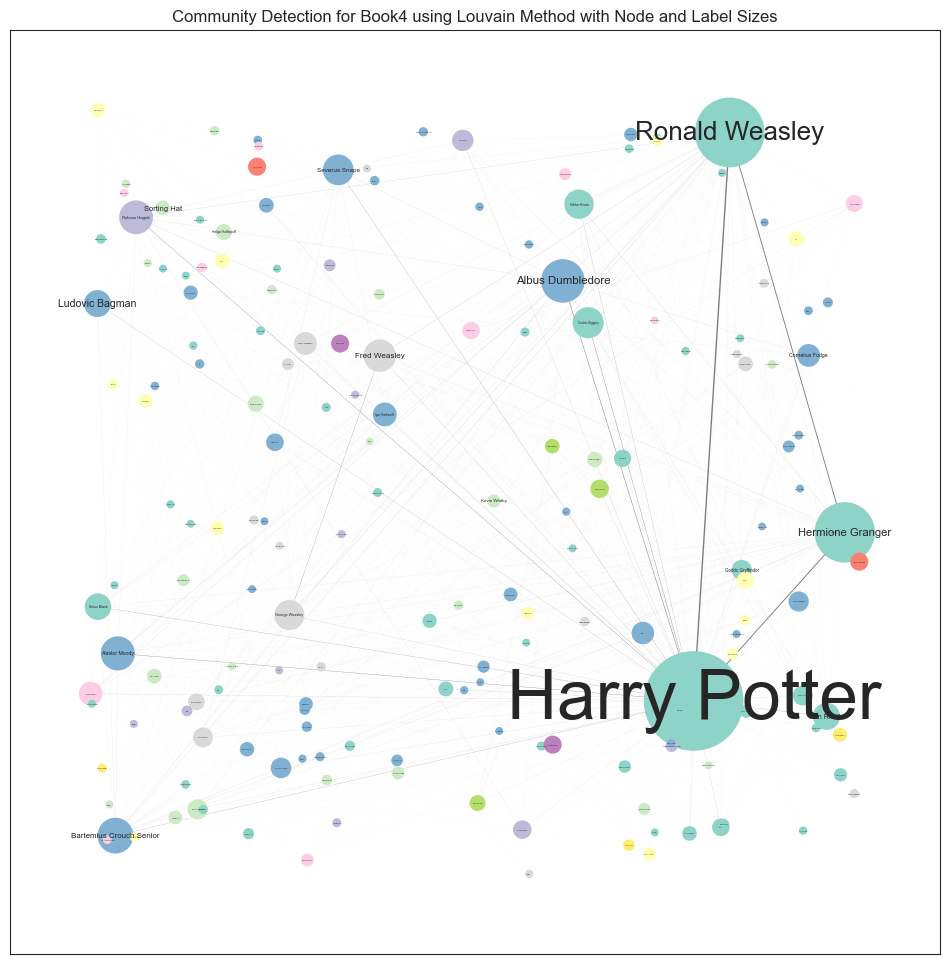

Community 0: ['Harry Potter', 'Ronald Weasley', 'Hermione Granger', 'Cedric Diggory', 'Sirius Black', 'Tom Riddle', 'Viktor Krum', 'Dobby', 'Fleur Delacour', 'Hedwig', 'Sybill Trelawney', 'Cho Chang', 'Godric Gryffindor', 'Pigwidgeon', 'Buckbeak', 'Colin Creevey', 'Angelina Johnson', 'Father Christmas', 'Padma Patil', 'Fat Lady', 'Blast-Ended Skrewt', 'Roger Davies', 'Crookshanks', 'Fawkes', 'Chudley Cannons', 'Wendelin the Weird', 'Arnold Peasegood', 'Nagini', 'Dennis Creevey', 'Violet', 'Cuthbert Binns', 'Septima Vector', 'Alicia Spinnet', 'Hope Howell', 'Errol', 'Hermes', 'Peter Pettigrew', 'James Potter I', 'Perkins', 'Fridwulfa', 'Archie Aymslowe', 'Oliver Wood', 'Irma Pince', 'Katie Bell', 'Natalie McDonald', 'Walden Macnair', 'Joey Jenkins', 'Boris the Bewildered', 'Cadogan', 'Miranda Goshawk']


Community 4: ['Albus Dumbledore', 'Alastor Moody', 'Severus Snape', 'Bartemius Crouch Senior', 'Ludovic Bagman', 'Winky', 'Igor Karkaroff', 'Minerva McGonagall', 'Cornelius Fudge', 'Arg

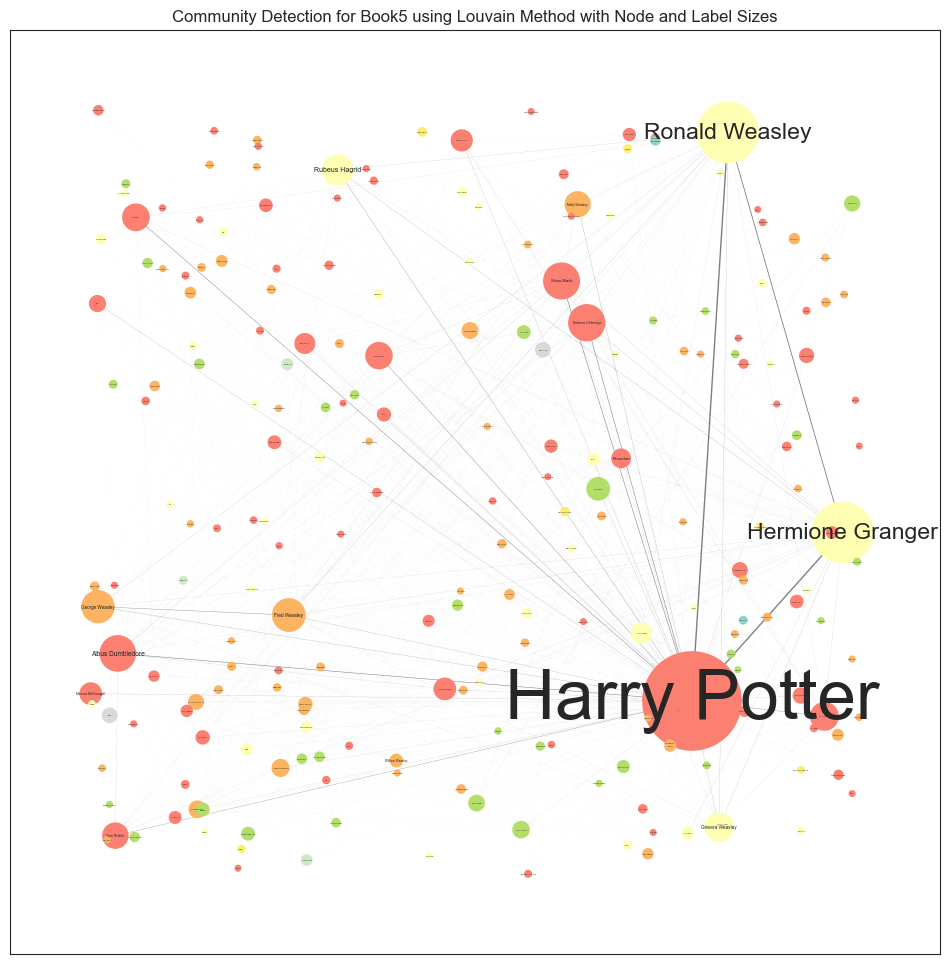

Community 2: ['Harry Potter', 'Sirius Black', 'Dolores Umbridge', 'Albus Dumbledore', 'Cho Chang', 'Severus Snape', 'Neville Longbottom', 'Tom Riddle', 'Dobby', 'Godric Gryffindor', 'Minerva McGonagall', 'Remus Lupin', 'Dudley Dursley', 'Cornelius Fudge', 'Hedwig', 'Kreacher', 'Bellatrix Lestrange', 'Seamus Finnigan', 'Prime Minister', 'Percy Weasley', 'James Potter I', 'Marietta Edgecombe', 'Vernon Dursley', 'Petunia Dursley', 'Argus Filch', 'Phineas Nigellus Black', 'Cassandra Trelawney', 'Lucius Malfoy', 'Cedric Diggory', 'Dean Thomas', 'Father Christmas', 'Sybill Trelawney', 'Tofty', 'Mark Evans', 'Fat Lady', 'Bane', 'Griselda Marchbanks', 'Fawkes', 'Antonin Dolohov', 'Pomona Sprout', 'Augustus Rookwood', 'Trevor', 'Lily J. Potter', 'Winky', 'Avery (Marauder-era)', 'Cadogan', 'Stanley Shunpike', 'Mrs Norris', 'Alice Longbottom', 'Magorian', 'Puddifoot', 'Tom Riddle Senior', 'Andromeda Tonks', 'Williamson', 'Euan Abercrombie', 'Merlin', 'Bartemius Crouch Junior', 'Aurora Sinistra', 

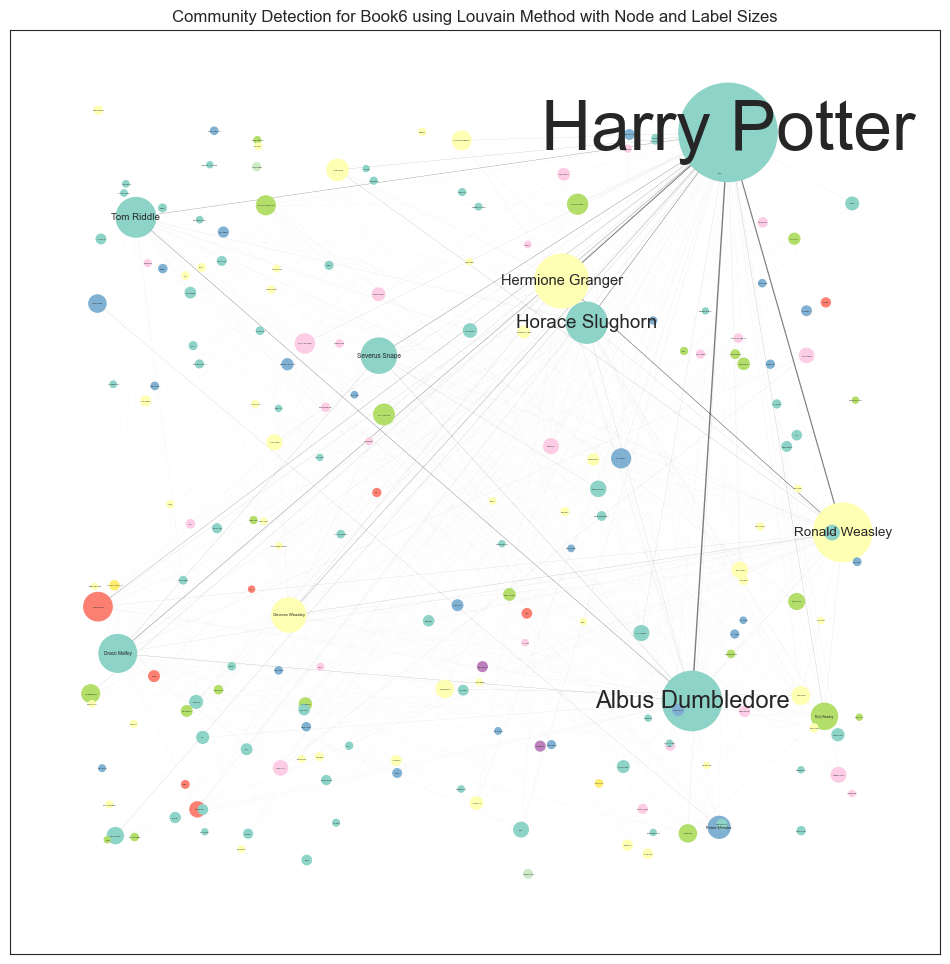

Community 0: ['Albus Dumbledore', 'Harry Potter', 'Horace Slughorn', 'Draco Malfoy', 'Tom Riddle', 'Severus Snape', 'Rufus Scrimgeour', 'Bellatrix Lestrange', 'Sybill Trelawney', 'Borgin', 'Cole', 'Hepzibah Smith', 'Kreacher', 'Argus Filch', 'Morfin Gaunt', 'Merope Riddle', 'Dobby', 'Bob Ogden', 'Rosmerta', 'Vernon Dursley', 'Fenrir Greyback', 'Fat Lady', 'Peeves', 'Lucius Malfoy', 'Caractacus Burke', 'Hokey', 'Mark Evans', 'Dolores Umbridge', 'Marvolo Gaunt', 'Will', 'Petunia Dursley', 'Hedwig', 'Nagini', 'Mundungus Fletcher', 'Armando Dippet', 'Eldred Worple', 'Fawkes', 'Golpalott', 'Dudley Dursley', 'Myrtle Warren', 'Irma Pince', 'Galatea Merrythought', 'Tom Riddle Senior', 'Sanguini', 'Mrs Norris', 'Narcissa Malfoy', 'Graham Montague', 'Billy Stubbs', 'Quirinus Quirrell', 'Alecto Carrow', 'Gibbon', 'Avery (Marauder-era)', 'Gilderoy Lockhart', 'Terry Boot', 'Marietta Edgecombe', 'Boris the Bewildered', 'Eric Whalley', 'Martha (disambiguation)', 'Colin Creevey', 'Corban Yaxley', 'Dir

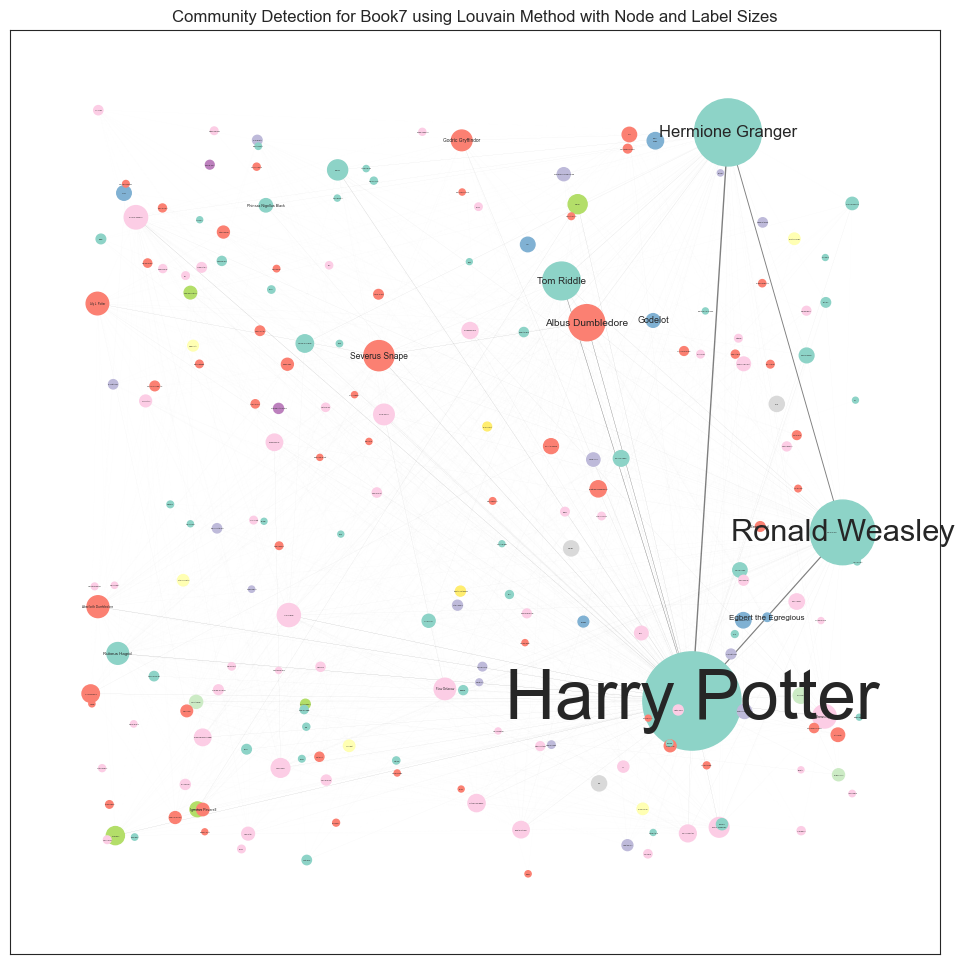

Community 0: ['Harry Potter', 'Hermione Granger', 'Ronald Weasley', 'Tom Riddle', 'Rubeus Hagrid', 'Griphook', 'Xenophilius Lovegood', 'Garrick Ollivander', 'Rufus Scrimgeour', 'Fenrir Greyback', 'Mykew Gregorovitch', 'Phineas Nigellus Black', 'Dudley Dursley', 'Hedwig', 'Lucius Malfoy', 'Helena Ravenclaw', 'Viktor Krum', 'Nagini', 'Bogrod', 'Travers', 'Beedle the Bard', 'Snatchers', 'Fat Lady', 'Seamus Finnigan', 'Helga Hufflepuff', 'Fang', 'Selwyn', 'Scabior', 'Perkins', 'Pigwidgeon', 'Merlin', 'Borgin', 'Marvolo Gaunt', 'Crookshanks', 'Babbitty Rabbity', 'Grawp', 'Thorfinn Rowle', 'Bernie', 'Cadogan', 'Buckbeak', 'Cedric Diggory', 'Lavender Brown', 'Leprechaun', 'Cuthbert Binns', 'Charity Burbage', 'Odo', 'Bartemius Crouch Senior', 'Bandon Banshee', 'Gamp', 'Mrs Norris', 'Hepzibah Smith']


Community 3: ['Albus Dumbledore', 'Severus Snape', 'Aberforth Dumbledore', 'Lily J. Potter', 'Bathilda Bagshot', 'Godric Gryffindor', 'Ariana Dumbledore', 'Gellert Grindelwald', 'Kendra Dumbledor

In [355]:
# Set the style and color palette
sns.set_style("white")

# Iterate over each book
for book, G in ({'All Books': allbooks, 'Book1': book1, 'Book2': book2, 'Book3': book3, 'Book4': book4, 'Book5': book5, 'Book6': book6, 'Book7': book7}).items():

    # Apply Louvain Method for community detection
    partition = community.best_partition(G)

    # Calculate node sizes based on PageRank centrality
    node_sizes = np.array([pagerank0[book][node] * 5000 for node in G.nodes()])

    # Calculate label sizes based on Betweenness Centrality
    #label_sizes = [betweenness0[book][node] * 3000 for node in G.nodes()]
    
    label_sizes = {node: betweenness0[book][node] * 50 for node in G.nodes()}
    
    # Get edge weights
    edge_weights = [data['weight'] for _, _, data in G.edges(data=True)]

    # Normalize edge weights for visualization
    max_weight = max(edge_weights)
    normalized_weights = [w / max_weight for w in edge_weights]

    # Draw the graph with nodes colored by community and scaled node/label sizes
    plt.figure(figsize=(12, 12))
    pos = nx.random_layout(G, seed = 13)  # You can use a different layout algorithm if needed

    # Draw nodes with sizes based on PageRank centrality and colors based on community
    nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color=list(partition.values()), cmap='Set3')
    
    # Draw edges with thickness based on edge weights
    nx.draw_networkx_edges(G, pos, width=normalized_weights, alpha=0.5)

    # Draw labels with sizes based on Betweenness Centrality
    #nx.draw_networkx_labels(G, pos, font_size = 8,labels = {node: node for node in G.nodes()}, verticalalignment='bottom')
    
    d = label_sizes
    #print(d)
    for node, (x, y) in pos.items():
 
        plt.text(x, y, node, fontsize=d[node], ha='center', va='center')
    

    # Show plot for the current book
    plt.title(f'Community Detection for {book} using Louvain Method with Node and Label Sizes')
    plt.show()
    
    communities = {}
    for node, community_id in partition.items():
        if community_id not in communities:
            communities[community_id] = []
        communities[community_id].append(node)

    # Print nodes for each community
    for community_id, nodes in communities.items():
        print(f"Community {community_id}: {nodes}\n\n")